In [30]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import trompy as tp

from scipy import stats

import dill

rcParams['font.family'] = 'Arial'
colors = ["#67AFD2", "#016895", "#F4795B", "#C74632"]

savefigs = True

DATAFOLDER = Path("..//data")
RESULTSFOLDER = Path("..//results")
FIGSFOLDER = Path("C:/Users/jmc010/Dropbox/Publications in Progress/Bazzino Roitman_sodium/figs")

In [2]:
with open(DATAFOLDER / "x_array_2clusters_alltrials.pickle", "rb") as f:
    x_array = dill.load(f)

In [3]:
with open(DATAFOLDER / "snips_data_selected_conditions.pickle", "rb") as f:
    data = dill.load(f)

snips_10NaCl = data["snips_10NaCl_selected"]
snips_45NaCl = data["snips_45NaCl_selected"]

snips_all = np.vstack([snips_10NaCl, snips_45NaCl])
snips_all.shape

(1967, 200)

C:\Users\jmc010\AppData\Local\Temp\ipykernel_24600\3214352425.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc.append(np.trapz(snip[50:150]))
C:\Users\jmc010\AppData\Local\Temp\ipykernel_24600\3214352425.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc.append(np.trapz(snip[50:150]))
C:\Users\jmc010\AppData\Local\Temp\ipykernel_24600\3214352425.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc.append(np.trapz(snip[50:150]))
C:\Users\jmc010\AppData\Local\Temp\ipykernel_24600\3214352425.py:25: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc.append(np.trapz(snip[50:150]))


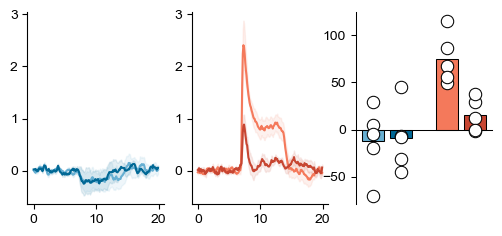

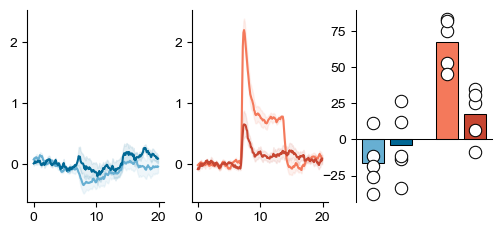

In [48]:
def get_mean_snips(snips, x_array, sex, condition):

    query_string = "condition == @condition & sex == @sex"

    snips_10, snips_45 = [], []
    for id in x_array.query(query_string + " & infusiontype == '10NaCl'").id.unique():
        snips_10.append(np.mean(snips_all[x_array.query(query_string + " & id == @id").index], axis=0))
    for id in x_array.query(query_string + " & infusiontype == '45NaCl'").id.unique():
        snips_45.append(np.mean(snips_all[x_array.query(query_string + " & id == @id").index], axis=0))
        
    return np.array(snips_10), np.array(snips_45)

def plot_snips(snips, color, ax):
    x = np.arange(snips.shape[1]) / 10
    mean = np.mean(snips, axis=0)
    sd = np.std(snips, axis=0)
    sem = sd / np.sqrt(snips.shape[0])
    
    ax.plot(x, mean, color=color, lw=1.5)
    ax.fill_between(x, mean-sem, mean+sem, alpha=0.1, color=color)
    
def get_auc(snips):
    auc = []
    for snip in snips:
        auc.append(np.trapz(snip[50:150]))
    return np.array(auc)

f, ax = plt.subplots(ncols=3, figsize=(6, 2.5))
ax[1].sharey(ax[0])

snips_10, snips_45 = get_mean_snips(snips_all, x_array, "M", "replete")
plot_snips(snips_10, colors[0], ax[0])
plot_snips(snips_45, colors[1], ax[0])
replete_aucs = [get_auc(snips_10), get_auc(snips_45)]


snips_10, snips_45 = get_mean_snips(snips_all, x_array, "M", "deplete")
plot_snips(snips_10, colors[2], ax[1])
plot_snips(snips_45, colors[3], ax[1])
deplete_aucs = [get_auc(snips_10), get_auc(snips_45)]

tp.barscatter([replete_aucs, deplete_aucs],
              ax=ax[2],
              barfacecolor=colors,
              barfacecolor_option="individual",
              spaced=0.5,)

for axis in ax:
    sns.despine(ax=axis)
    
if savefigs:
    f.savefig(FIGSFOLDER / "snips_male.pdf", dpi=600, transparent=True)
    
    
f, ax = plt.subplots(ncols=3, figsize=(6, 2.5))
ax[1].sharey(ax[0])

snips_10, snips_45 = get_mean_snips(snips_all, x_array, "F", "replete")
plot_snips(snips_10, colors[0], ax[0])
plot_snips(snips_45, colors[1], ax[0])
replete_aucs = [get_auc(snips_10), get_auc(snips_45)]


snips_10, snips_45 = get_mean_snips(snips_all, x_array, "F", "deplete")
plot_snips(snips_10, colors[2], ax[1])
plot_snips(snips_45, colors[3], ax[1])
deplete_aucs = [get_auc(snips_10), get_auc(snips_45)]

tp.barscatter([replete_aucs, deplete_aucs],
              ax=ax[2],
              barfacecolor=colors,
              barfacecolor_option="individual",
              spaced=0.5,)

for axis in ax:
    sns.despine(ax=axis)
    
if savefigs:
    f.savefig(FIGSFOLDER / "snips_female.pdf", dpi=600, transparent=True)


    


In [15]:
snips_10[0].shape

(200,)

In [13]:
x_array

,trial,id,condition,infusiontype,cluster,sex
0,0,PB23,deplete,10NaCl,0,F
1,1,PB23,deplete,10NaCl,0,F
2,2,PB23,deplete,10NaCl,0,F
3,3,PB23,deplete,10NaCl,1,F
4,4,PB23,deplete,10NaCl,0,F
...,...,...,...,...,...,...
1962,44,PB75,replete,45NaCl,1,F
1963,45,PB75,replete,45NaCl,1,F
1964,46,PB75,replete,45NaCl,1,F
1965,47,PB75,replete,45NaCl,1,F
